In [1]:
import sys
sys.path.insert(0, "../python")

from propagation import laser
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import integrate

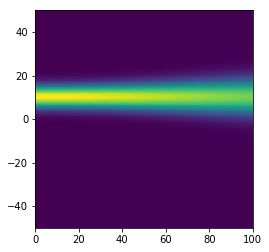

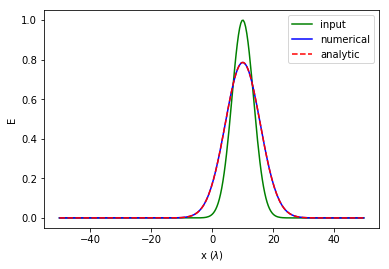

In [2]:
# The fft algorithm is significantly faster for powers of 2
Nx = 2**8
X = 100
x = np.linspace(-X/2, X/2, Nx, False)
Nz = 256
Z = 100
z = np.linspace(0, Z, Nz)

w0 = 5
zR = np.pi * w0**2
wZ = w0 * np.sqrt(1 + (Z/zR)**2)
E = np.exp(-(x-10)**2 / w0**2)
# Sqrt is because we are in 1D
EE = np.sqrt(w0 / wZ) * np.exp(-(x-10)**2 / wZ**2)

Ez = np.transpose(abs(laser.fourier_prop(E, x, z, 1)))

# Need to flip ud to put in the correct format for imshow
plt.imshow(np.flipud(Ez), extent=[0, Z, -X/2, X/2])
plt.show()

plt.plot(x, E, 'g-', x, Ez[:, Nz-1], 'b-', x, EE, 'r--')
plt.xlabel(r'x ($\lambda$)')
plt.ylabel('E')
plt.legend(['input', 'numerical', 'analytic'])
plt.show()

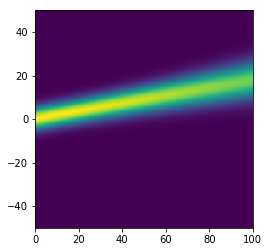

In [3]:
Nx = 2**8
X = 100
x = np.linspace(-X/2, X/2, Nx, False)
Nz = 256
Z = 100
z = np.linspace(0, Z, Nz)

theta = np.radians(10)
w0 = 5
zR = np.pi * w0**2
wZ = w0 * np.sqrt(1 + (x*np.sin(theta)/zR)**2)
wave = np.exp(1j*2*np.pi*x*np.sin(theta))
E = np.exp(-(x*np.cos(theta))**2 / w0**2) * wave

Ez = np.transpose(abs(laser.fourier_prop(E, x, z, 1)))

plt.imshow(np.flipud(Ez), extent=[0, Z, -X/2, X/2])
plt.show()

In [9]:
Nx = 2**8
X = 100
x = np.linspace(-X/2, X/2, Nx, False)
Ny = 2**8
Y = 100
y = np.linspace(-Y/2, Y/2, Ny, False)

Nz = 256
Z = 100
z = np.linspace(0, Z, Nz)

w0 = 5
zR = np.pi * w0**2
wZ = w0 * np.sqrt(1 + (Z/zR)**2)
E = np.exp(-(np.reshape(x-10, (Nx, 1))**2 + np.reshape(y, (1, Ny))**2) / w0**2)
EE = (w0 / wZ) * np.exp(-(x-10)**2 / wZ**2)

Ez = abs(laser.fourier_prop2(E, x, y, z, 1))

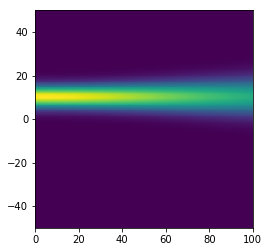

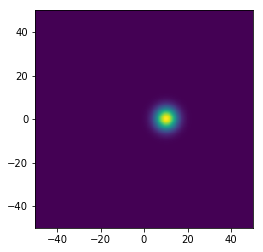

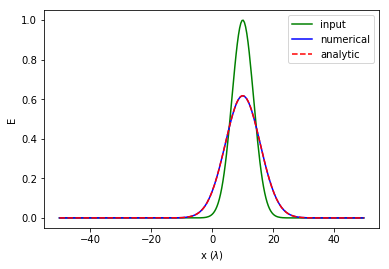

In [24]:
plt.imshow(np.flipud(np.transpose(Ez[:, :, int(Ny/2)])), extent=[0, Z, -X/2, X/2])
plt.show()

plt.imshow(np.flipud(np.transpose(Ez[0, :, :])), extent=[-X/2, X/2, -Y/2, Y/2])
plt.show()

plt.plot(x, E[:, int(Ny/2)], 'g-', x, Ez[Nz-1, :, int(Ny/2)], 'b-', x, EE, 'r--')
plt.xlabel(r'x ($\lambda$)')
plt.ylabel('E')
plt.legend(['input', 'numerical', 'analytic'])
plt.show()

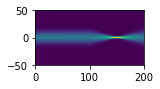

In [7]:
# Test of a lens real quick
Nx = 2**8
X = 100
x = np.linspace(-X/2, X/2, Nx, False)
Nz = 256
Z = 100
z = np.linspace(0, Z, Nz)

w0 = 10
zR = np.pi * w0**2
wZ = w0 * np.sqrt(1 + (Z/zR)**2)
E0 = np.exp(-x**2 / w0**2)

E1 = laser.fourier_prop(E0, x, z, 1)

f = 50.0
El = E1[Nz-1,:] * np.exp(-1j*np.pi*x**2/(f))
E2 = laser.fourier_prop(El, x, z, 1)

E = np.concatenate((E1, E2[1:, :]))

# Need to flip ud to put in the correct format for imshow
plt.figure(figsize=(2, 1))
plt.imshow(np.flipud(np.transpose(abs(E))), extent=[0, 2*Z, -X/2, X/2])
plt.show()